<a href="https://colab.research.google.com/github/Darshini-A/Deep-Learning/blob/main/BiLSTM%208%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Implement text classification of movie review using BI-LSTM

In [13]:
import numpy as np
from keras.datasets import imdb
from keras.models import Sequential
from keras.preprocessing import sequence
from keras.layers import Dropout
from keras.layers import Dense, Embedding, LSTM, Bidirectional
from matplotlib import pyplot

In [14]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = 10000)

In [4]:
max_len = 200

x_train = sequence.pad_sequences(x_train, maxlen = max_len)
x_test = sequence.pad_sequences(x_test, maxlen = max_len)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [5]:
x_train.shape, y_train.shape

((25000, 200), (25000,))

In [6]:
x_test.shape, y_test.shape

((25000, 200), (25000,))

In [7]:
n_unique_words = 10000

model = Sequential()
model.add(Embedding(n_unique_words, 128, input_length = max_len))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [8]:
history = model.fit(x_train, y_train,
                    batch_size = 300,
                    epochs = 5,
                    validation_data = [x_test, y_test])

Epoch 1/5
84/84 [==============================] - 146s 2s/step - loss: 0.5328 - accuracy: 0.7270 - val_loss: 0.3339 - val_accuracy: 0.8590
Epoch 2/5
84/84 [==============================] - 139s 2s/step - loss: 0.2631 - accuracy: 0.8976 - val_loss: 0.3013 - val_accuracy: 0.8722
Epoch 3/5
84/84 [==============================] - 140s 2s/step - loss: 0.1883 - accuracy: 0.9326 - val_loss: 0.3140 - val_accuracy: 0.8676
Epoch 4/5
84/84 [==============================] - 145s 2s/step - loss: 0.1529 - accuracy: 0.9480 - val_loss: 0.3603 - val_accuracy: 0.8576
Epoch 5/5
84/84 [==============================] - 144s 2s/step - loss: 0.1306 - accuracy: 0.9558 - val_loss: 0.3969 - val_accuracy: 0.8601


In [10]:
print(history.history['loss'])

[0.5327879786491394, 0.26314616203308105, 0.18828004598617554, 0.15293610095977783, 0.1305898278951645]


In [11]:
print(history.history['accuracy'])

[0.7269600033760071, 0.8975600004196167, 0.9325600266456604, 0.9480400085449219, 0.955839991569519]


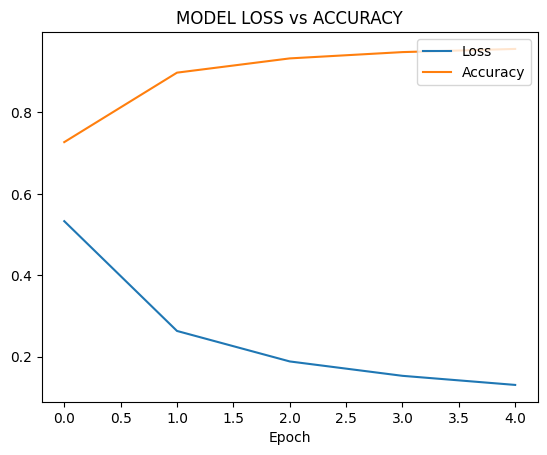

In [15]:
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['accuracy'])
pyplot.title('MODEL LOSS vs ACCURACY')
pyplot.xlabel('Epoch')
pyplot.legend(['Loss', 'Accuracy'], loc = 'upper right')
pyplot.show()